# Notebook 9 - Redes Neuronales en Tensorflow.


*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*
*   Recuerda que Google es tu amigo, y saber buscar la información en las documentaciones de las librerías es muy importante.
*   Una solución correcta no es la que funciona sino la que se entiende!
*   No dudes en preguntar cualquier duda al profesor que lleva todo el día dando la turra.

## 1. Red Neuronal Multicapa para MNIST.

Hoy trabajaremos nuevamente sobre el conocidísimo dataset MNIST. Este dataset contiene 20.000 muestras de imagenes de 28x28 píxeles (784 píxeles), que nosotros trataremos como variables independientes. Es decir, trabajaremos con un dataset de dimensiones 20.000x784. Cada una de las variables de entrada contiene un valor entero que varía de 0 a 255 indicando la intensidad en escala de grises del pixel correspondiente.

El Viernes pasado conseguimos obtener aproximadamente un 50% de precisión con un clasificador semi-supervisado (50 puntos) y cerca de un 90% de precisión con un clasificador logístico (entrenado con todos los puntos). ¿Podemos conseguir una mejor precisión utilizando una Red Neuronal Multicapa? ¡Vamos a verlo!

---

**Tu tarea:** Vamos a utilizar las funcionalidades de Keras para crear y entrenar a nuestro clasificador. En este caso, deberás de utilizar la documentación de Keras para ver cómo conseguir esto. Te puede interesar ver cómo te pueden ayudar funciones como ***tf.keras.layers.Dense(...)***, ***tf.keras.layers.Sequential(...)*** o *** model.fit()***.

1. Recuerda que para comenzar deberás de preprocesar correctamente tus datos: escalar las variables, convertir etiquetas a **one-hot label**, etc.
2. Una vez tengas tus datos, genérate tus datos de entrenamiento y de validación.
3. Construye tu modelo con Keras. En este punto tienes libertad para elegir cuántas capas utilizar, cuántas neuronas, qué tipo de función de activación, etc. Cada decisión que tomes de la arquitectura debe de estar justificada. Utiliza Google para apoyar tus decisiones.
4. Entrena tu modelo con Keras. En este punto tienes libertad para elegir qué optimizador usar, qué learning-rate, qué batch_size, epochs, etc. Cada decisión que tomes de la arquitectura debe de estar justificada. Utiliza Google para apoyar tus decisiones.
5. Cuando entrenes a tu modelo, para cada *epoch* muestra métricas de *MSE* y *Accuracy*.
6. Una vez tengas a tu modelo entrenado, ¿Qué accuracy has obtenido? Selecciona algunos ejemplos que NO hayan sido clasificados correctamente por tu clasificador y visualizalos. Muestra igualmente en el título de cada gráfica la predicción generada por tu modelo. ¿Tienen sentido esos fallos?.



In [0]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Cargamos el dataset desde el archivo.
mnist = pd.read_csv("./sample_data/mnist_train_small.csv", header=None).as_matrix()

# Guardamos las variables X e Y.
X, Y = mnist[:, 1:], mnist[:, 0:1]

In [0]:
import tensorflow as tf

# Reseteamos el grafo de operaciones.
tf.reset_default_graph()

# Utilizamos Sesiones interactivas para
# ahorrarnos especificar que sesión vamos
# a utilizar.
sess = tf.InteractiveSession()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
from tensorflow.keras.layers     import Dense
from tensorflow.keras.utils      import to_categorical
from tensorflow.keras.optimizers import SGD

from sklearn.model_selection import train_test_split

# Normalizamos input y codificamos output con one-hot encoding.
Xt = X / 255
Yt = to_categorical(Y, 10)

# Generamos train y test set.
X_train, X_test, Y_train, Y_test = train_test_split(Xt, Yt, train_size=0.7)

# Inicializamos el modelo.
model = tf.keras.Sequential()

# Adds a densely-connected layer with 64 units to the model:
model.add(Dense(128, activation='relu'))
# Add another:
model.add(Dense(64,  activation='relu'))
# Add another:
model.add(Dense(32,  activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(10, activation='softmax'))

# Configure a model for mean-squared error regression.
model.compile(optimizer=SGD(lr=0.05),
              loss='mse',            # mean squared error
              metrics=['acc'])       # mean absolute error


arr = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 14000 samples, validate on 6000 samples
Epoch 1/200
14000/14000 [==============================] - 2s 117us/step - loss: 0.0886 - acc: 0.2343 - val_loss: 0.0864 - val_acc: 0.3378
Epoch 2/200
14000/14000 [==============================] - 1s 100us/step - loss: 0.0830 - acc: 0.3771 - val_loss: 0.0792 - val_acc: 0.4080
Epoch 3/200
14000/14000 [==============================] - 1s 102us/step - loss: 0.0732 - acc: 0.4744 - val_loss: 0.0674 - val_acc: 0.5178
Epoch 4/200
14000/14000 [==============================] - 1s 104us/step - loss: 0.0589 - acc: 0.6111 - val_loss: 0.0518 - val_acc: 0.6988
Epoch 5/200
14000/14000 [==============================] - 1s 105us/step - loss: 0.0425 - acc: 0.7711 - val_loss: 0.0362 - val_acc: 0.8027
Epoch 6/200
14000/14000 [==============================] - 1s 104us/step - loss: 0.0307 - acc: 0.8342 - val_loss: 0.0276 - val_acc: 0.8455
Epoch 7/200
14000/14000 [==============================] - 2s 117us/step - loss: 0.0246 - acc: 0.8606 - val_loss: 0.0

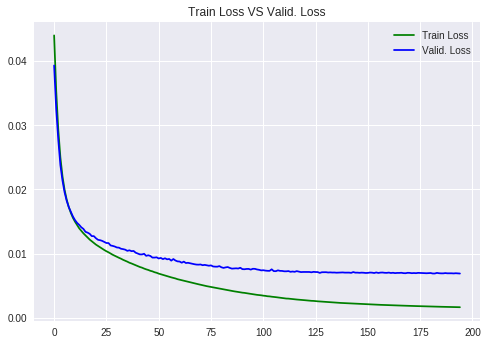

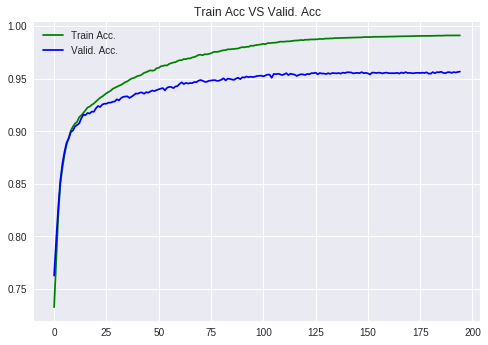

In [0]:
plt.title("Train Loss VS Valid. Loss")
plt.plot(arr.history['loss'][5:],     c="green")
plt.plot(arr.history['val_loss'][5:], c="blue" )
plt.legend(['Train Loss', 'Valid. Loss'])
plt.show()

plt.title("Train Acc VS Valid. Acc")
plt.plot(arr.history['acc'][5:],     c="green")
plt.plot(arr.history['val_acc'][5:], c="blue" )
plt.legend(['Train Acc.', 'Valid. Acc.'])
plt.show()

In [0]:
import numpy.random

# Predecimos las etiquetas de 100 valores elegidos aleatoriamente.
idxs = np.random.choice(X_test.shape[0], 100, replace=False)
lbls = np.argmax(model.predict(X_test[idxs,:]), axis=1)

# Y guardamos los índices de las predicciones incorrectas.
wrong = idxs[np.argmax(Y_test[idxs], axis=1) != lbls]

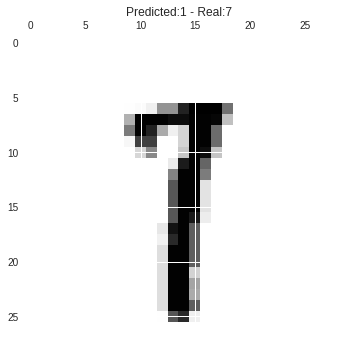

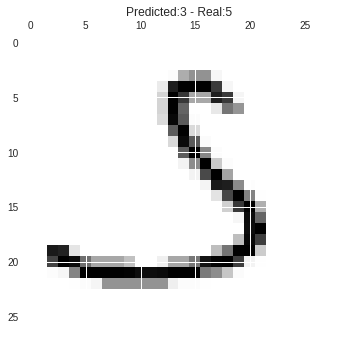

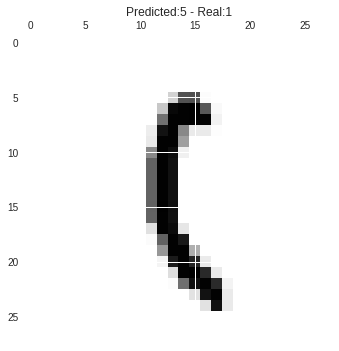

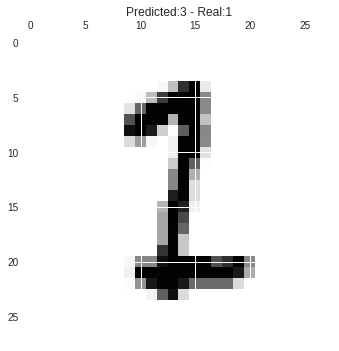

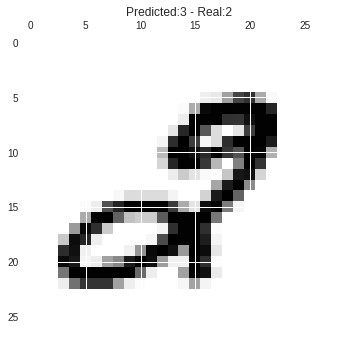

In [0]:
for i in wrong: 
  plt.matshow(X_test[i,:].reshape(28, 28))
  plt.title("Predicted:" + str(np.argmax(model.predict(X_test[i:i+1,:]))) + " - Real:" + str(np.argmax(Y_test[i:i+1,:])))
  plt.show()